# Dispersion Coefficients Near Surfaces

In [1]:
# %pip install -q pairinteraction # Uncomment for installation on Colab

import matplotlib.pyplot as plt
import numpy as np
import pairinteraction as pi

if pi.Database.get_global_database() is None:
    pi.Database.initialize_global_database(download_missing=True)

In [2]:
ket1 = pi.KetAtom("Rb", n=69, l=0, j=0.5, m=0.5)
ket2 = pi.KetAtom("Rb", n=72, l=0, j=0.5, m=0.5)

# Ag at omega = 2 * np.pi * 10.5277GHz which is almost perfectly reflecting
epsilon = -29761.679813480383 + 32823550.74763878j
distance_atoms = 10.0  # micrometer
distance_surface_list = np.linspace(0.01 * distance_atoms, 2 * distance_atoms, 20)

c6_list = []
for z in distance_surface_list:
    eff_system = pi.EffectiveSystemPair([(ket1, ket2), (ket2, ket1)])

    gt = pi.GreenTensorSurface(
        [0, 0, 0], [distance_atoms, 0, 0], z=-z, unit="micrometer", static_limit=True
    )
    gt.set_relative_permittivities(1.0, epsilon)
    eff_system.system_pair.set_green_tensor(gt)

    eff_h = eff_system.get_effective_hamiltonian(return_order=2, unit="GHz")
    c6 = -eff_h[0, 0] * (distance_atoms**6)  # GHz um^6
    c6_list.append(c6)

/itp3/home/moegerle/Desktop/PairInteraction/pairinteraction_green_tensor/src/pairinteraction/green_tensor/utils.py:529: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  real_real, _ = quad(


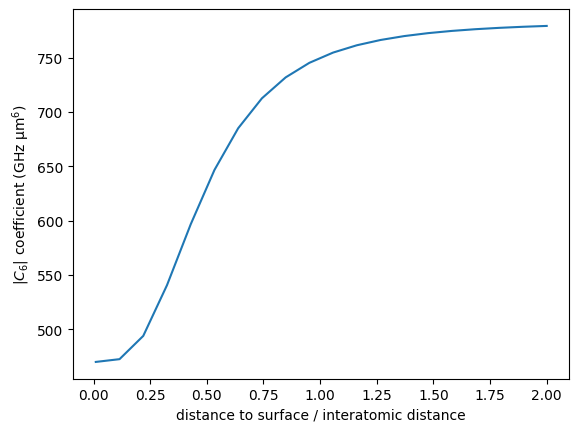

In [3]:
fig, ax = plt.subplots()
ax.plot(distance_surface_list / distance_atoms, np.abs(c6_list))
ax.set_xlabel("distance to surface / interatomic distance")
ax.set_ylabel("$|C_6|$ coefficient (GHz μm$^6$)")
plt.show()